### 독립변수 상관관계분석

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')
rc('font', family='AppleGothic')

In [3]:
### 데이터 불러오기

In [22]:
df= pd.read_csv("/Users/crlee/pandas/서울시_골목상권_스케일링.csv",encoding = 'cp949')
df

,상권별_매출액_평균,프랜차이즈_점포_수,식료품_지출_총금액,의류_신발_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,평일_생활인구_수,주말_생활인구_수,연령대_1020_생활인구_수,연령대_3040_생활인구_수,연령대_5060_생활인구_수,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수
0,-0.042609,0.740132,-0.180160,-0.225862,-0.254753,-0.256181,-0.233951,-0.170917,-0.151346,-0.049461,-0.376111,-0.068390,-0.180923,-0.091914,-0.185458
1,-0.282165,-0.541101,-0.382371,-0.577755,-0.499244,-0.750498,-0.602524,-1.039740,-0.800888,-1.098422,-1.161177,-0.695839,-0.933633,-0.738919,-1.185555
2,-0.080340,0.593045,-0.246836,-0.268112,-0.313630,-0.245193,-0.288547,0.566575,0.578880,0.438301,0.423169,0.778449,0.522230,0.728681,0.497789
3,-0.430378,-0.170471,0.237345,0.221854,0.220176,0.240030,0.228018,0.023941,0.047867,-0.014254,-0.129469,0.208636,-0.029849,-0.009234,0.115923
4,0.075029,0.222414,0.042486,-0.060338,-0.024744,-0.175827,-0.062019,0.841615,0.865336,0.831506,0.767194,0.938618,0.844757,0.985235,0.756600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,1.854051,-1.103786,-1.121434,-1.190433,-1.268502,-1.226097,-1.230666,-8.553047,-7.619022,-7.631545,-7.855588,-7.814404,-8.133096,-7.987989,-7.414956
1083,1.398018,-2.313929,-0.466656,-0.450141,-0.530027,-0.568451,-0.439101,-3.465680,-3.405518,-3.493373,-3.432521,-3.311518,-3.314819,-3.229080,-3.990564
1084,1.693443,-1.550414,-0.794214,-0.730366,-0.838246,-0.597168,-0.746822,-1.312612,-1.360539,-1.259760,-1.208587,-1.427719,-1.361682,-1.558615,-1.120985
1085,-1.278567,-1.103786,-0.474913,-0.405105,-0.499707,-0.296139,-0.440054,0.237485,0.105896,0.243414,0.360169,0.033239,0.276917,0.258693,0.110869


In [25]:
df2= pd.read_csv("/Users/crlee/pandas/서울시_골목상권_재범주.csv",encoding = 'cp949')
df2

,상권_코드_명,상권별_매출액_평균,프랜차이즈_점포_수,식료품_지출_총금액,의류_신발_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,평일_생활인구_수,주말_생활인구_수,시군구_명,연령대_1020_생활인구_수,연령대_3040_생활인구_수,연령대_5060_생활인구_수,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수
0,4.19민주묘지역 2번,1.787499e+08,15,153409088.0,66086125.0,16527418.0,67936118.0,23209006.0,17727,7189,강북구,8442,6268,10205,8131,7759,9025
1,KT&G 북부지사,1.489174e+08,4,103482570.0,33922469.0,10648492.0,26185510.0,11850089.0,6430,3320,강북구,2416,2503,4831,3467,3724,2559
2,가오리역 1번,1.736823e+08,13,134732302.0,61000987.0,14867222.0,69391243.0,21009363.0,41924,17133,강북구,15103,15957,27997,18027,19683,21346
3,가오리역 2번,1.330093e+08,6,345845765.0,154382931.0,38820923.0,176899921.0,53897514.0,22254,9111,강북구,8804,8363,14197,9648,8522,13194
4,강북구청,1.955185e+08,9,236654594.0,90436416.0,24992761.0,79324159.0,31756979.0,57793,24087,강북구,24138,23857,33885,25973,26332,29576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,청계산원터골,7.587535e+08,2,24543421.0,10622543.0,2670498.0,10464033.0,3768680.0,0,0,서초구,0,0,0,0,0,0
1083,청계산입구역 2번(내곡동주민센터),5.359684e+08,0,87820910.0,43203576.0,10075125.0,37200033.0,15964810.0,378,149,서초구,138,175,213,233,220,73
1084,한국상담대학원대학교,6.713270e+08,1,46411277.0,25402871.0,5788545.0,35195730.0,9108090.0,4676,1706,서초구,1993,2368,2019,2135,1469,2776
1085,한전아트센터,6.967944e+07,2,86420436.0,47052803.0,10639633.0,62897294.0,15937072.0,28553,9762,서초구,11971,14824,11519,13655,11549,13110


<Axes: >

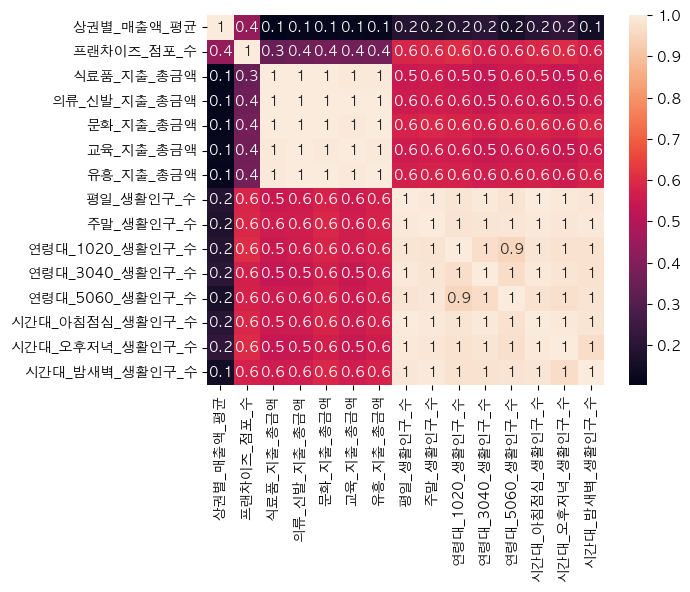

In [23]:
df.corr()
sns.heatmap(df.corr(), annot=True, fmt='.1g')

In [24]:
df2 = df.corr()
df2

,상권별_매출액_평균,프랜차이즈_점포_수,식료품_지출_총금액,의류_신발_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,평일_생활인구_수,주말_생활인구_수,연령대_1020_생활인구_수,연령대_3040_생활인구_수,연령대_5060_생활인구_수,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수
상권별_매출액_평균,1.000000,0.439931,0.104294,0.116588,0.117240,0.121452,0.117854,0.189259,0.177204,0.189793,0.204647,0.161603,0.199420,0.219741,0.149250
프랜차이즈_점포_수,0.439931,1.000000,0.345000,0.353706,0.372693,0.362943,0.366860,0.586098,0.590433,0.602968,0.570179,0.574506,0.588903,0.600525,0.573310
식료품_지출_총금액,0.104294,0.345000,1.000000,0.997383,0.996740,0.990112,0.996021,0.547556,0.558879,0.545729,0.536651,0.555055,0.548664,0.537126,0.557613
의류_신발_지출_총금액,0.116588,0.353706,0.997383,1.000000,0.998332,0.996604,0.999321,0.553620,0.563339,0.555957,0.543502,0.554573,0.555152,0.542846,0.562240
문화_지출_총금액,0.117240,0.372693,0.996740,0.998332,1.000000,0.993609,0.999233,0.579296,0.589409,0.582520,0.568662,0.578733,0.580727,0.567792,0.588698
교육_지출_총금액,0.121452,0.362943,0.990112,0.996604,0.993609,1.000000,0.996209,0.553991,0.563052,0.560433,0.544130,0.550559,0.555387,0.543558,0.562004
유흥_지출_총금액,0.117854,0.366860,0.996021,0.999321,0.999233,0.996209,1.000000,0.570124,0.579943,0.573832,0.559424,0.569520,0.571654,0.558577,0.579279
평일_생활인구_수,0.189259,0.586098,0.547556,0.553620,0.579296,0.553991,0.570124,1.000000,0.994829,0.985677,0.990999,0.982230,0.998806,0.992033,0.988572
주말_생활인구_수,0.177204,0.590433,0.558879,0.563339,0.589409,0.563052,0.579943,0.994829,1.000000,0.982180,0.983835,0.987156,0.991934,0.986869,0.993877
연령대_1020_생활인구_수,0.189793,0.602968,0.545729,0.555957,0.582520,0.560433,0.573832,0.985677,0.982180,1.000000,0.968806,0.949775,0.985198,0.976975,0.976547


In [8]:
df2 = df2.sort_values('상권별_매출액_평균', ascending=False)
df2

,상권별_매출액_평균,프랜차이즈_점포_수,식료품_지출_총금액,의류_신발_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,평일_생활인구_수,주말_생활인구_수,연령대_1020_생활인구_수,연령대_3040_생활인구_수,연령대_5060_생활인구_수,시간대_아침점심_생활인구_수,시간대_오후저녁_생활인구_수,시간대_밤새벽_생활인구_수
상권별_매출액_평균,1.000000,0.271442,0.107314,0.122529,0.119476,0.125009,0.119272,0.122393,0.108820,0.115253,0.142342,0.089504,0.128557,0.145969,0.091665
프랜차이즈_점포_수,0.271442,1.000000,0.569721,0.572031,0.582237,0.559933,0.573006,0.571392,0.570158,0.586371,0.544321,0.532877,0.570382,0.594046,0.548461
시간대_오후저녁_생활인구_수,0.145969,0.594046,0.784605,0.774855,0.789216,0.739787,0.773765,0.988865,0.981412,0.948259,0.970202,0.949223,0.989402,1.000000,0.961551
연령대_3040_생활인구_수,0.142342,0.544321,0.805251,0.801564,0.814213,0.769936,0.799669,0.980070,0.969594,0.917487,1.000000,0.922931,0.980460,0.970202,0.964185
시간대_아침점심_생활인구_수,0.128557,0.570382,0.806651,0.797904,0.811548,0.762835,0.796769,0.998771,0.989723,0.956015,0.980460,0.958541,1.000000,0.989402,0.982658
교육_지출_총금액,0.125009,0.559933,0.958455,0.986308,0.973093,1.000000,0.985394,0.769916,0.778750,0.746540,0.769936,0.730468,0.762835,0.739787,0.788913
의류_신발_지출_총금액,0.122529,0.572031,0.988770,1.000000,0.994705,0.986308,0.998961,0.805254,0.815759,0.768063,0.801564,0.779097,0.797904,0.774855,0.825254
평일_생활인구_수,0.122393,0.571392,0.815082,0.805254,0.818824,0.769916,0.804241,1.000000,0.993968,0.957128,0.980070,0.963562,0.998771,0.988865,0.988904
문화_지출_총금액,0.119476,0.582237,0.990479,0.994705,1.000000,0.973093,0.996669,0.818824,0.829581,0.789160,0.814213,0.786145,0.811548,0.789216,0.838242
유흥_지출_총금액,0.119272,0.573006,0.987501,0.998961,0.996669,0.985394,1.000000,0.804241,0.814670,0.773643,0.799669,0.773315,0.796769,0.773765,0.824343


In [9]:
X = df.loc[:,'프랜차이즈_점포_수':'주말_생활인구_수']
y = df['상권별_매출액_평균']

### 상관계수 계산

In [10]:
correlation_matrix = np.corrcoef(X.values.T, y)

In [11]:
print(correlation_matrix)

[[1.         0.5697215  0.57203128 0.58223659 0.5599328  0.57300649
  0.5713924  0.57015766 0.27144225]
 [0.5697215  1.         0.98876965 0.99047915 0.95845494 0.98750135
  0.81508228 0.82792228 0.10731436]
 [0.57203128 0.98876965 1.         0.99470514 0.98630821 0.99896137
  0.80525417 0.81575858 0.12252883]
 [0.58223659 0.99047915 0.99470514 1.         0.9730928  0.99666896
  0.81882407 0.82958096 0.11947563]
 [0.5599328  0.95845494 0.98630821 0.9730928  1.         0.98539447
  0.7699161  0.7787499  0.12500885]
 [0.57300649 0.98750135 0.99896137 0.99666896 0.98539447 1.
  0.80424087 0.81467008 0.11927238]
 [0.5713924  0.81508228 0.80525417 0.81882407 0.7699161  0.80424087
  1.         0.99396826 0.12239334]
 [0.57015766 0.82792228 0.81575858 0.82958096 0.7787499  0.81467008
  0.99396826 1.         0.1088199 ]
 [0.27144225 0.10731436 0.12252883 0.11947563 0.12500885 0.11927238
  0.12239334 0.1088199  1.        ]]


In [12]:
### 산점도

In [13]:
import matplotlib.pyplot as plt

In [14]:
X = df.프랜차이즈_점포_수.values
Y = df.상권별_매출액_평균.values

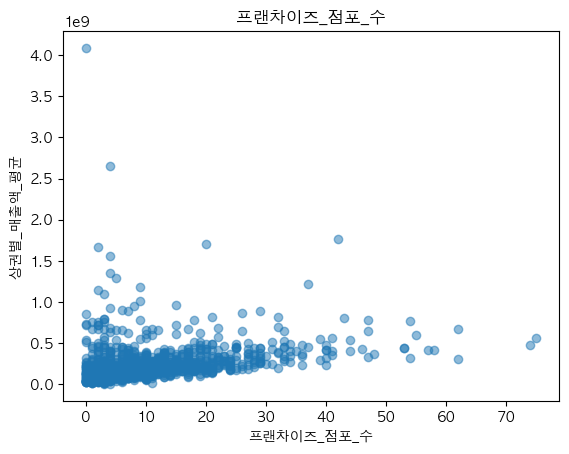

In [15]:
plt.scatter(X,Y, alpha=0.5)
plt.title('프랜차이즈_점포_수')
plt.xlabel('프랜차이즈_점포_수')
plt.ylabel('상권별_매출액_평균')
plt.show()

In [26]:
import pandas as pd

# 데이터프레임에서 독립 변수들을 선택합니다.
independent_vars = df.loc[:,'프랜차이즈_점포_수':'주말_생활인구_수']

# 상관 행렬을 계산합니다.
correlation_matrix = independent_vars.corr()
correlation_matrix

,프랜차이즈_점포_수,식료품_지출_총금액,의류_신발_지출_총금액,문화_지출_총금액,교육_지출_총금액,유흥_지출_총금액,평일_생활인구_수,주말_생활인구_수
프랜차이즈_점포_수,1.000000,0.345000,0.353706,0.372693,0.362943,0.366860,0.586098,0.590433
식료품_지출_총금액,0.345000,1.000000,0.997383,0.996740,0.990112,0.996021,0.547556,0.558879
의류_신발_지출_총금액,0.353706,0.997383,1.000000,0.998332,0.996604,0.999321,0.553620,0.563339
문화_지출_총금액,0.372693,0.996740,0.998332,1.000000,0.993609,0.999233,0.579296,0.589409
교육_지출_총금액,0.362943,0.990112,0.996604,0.993609,1.000000,0.996209,0.553991,0.563052
유흥_지출_총금액,0.366860,0.996021,0.999321,0.999233,0.996209,1.000000,0.570124,0.579943
평일_생활인구_수,0.586098,0.547556,0.553620,0.579296,0.553991,0.570124,1.000000,0.994829
주말_생활인구_수,0.590433,0.558879,0.563339,0.589409,0.563052,0.579943,0.994829,1.000000


<Axes: >

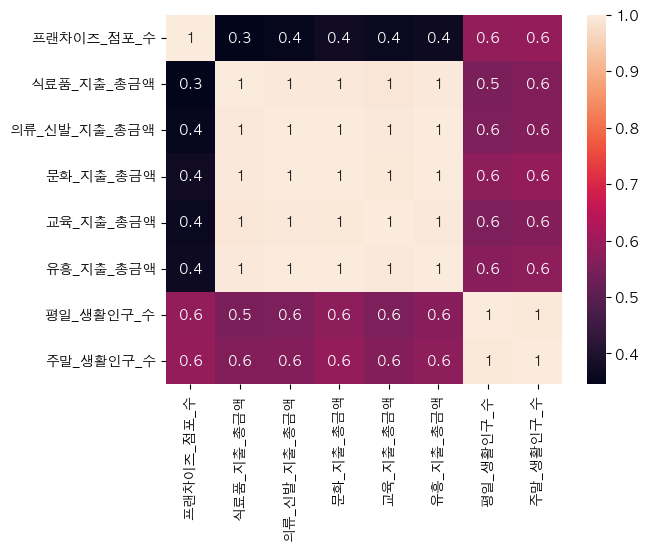

In [27]:
sns.heatmap(correlation_matrix, annot=True, fmt='.1g')
